# Team 16 - Dhumgod
Team Members:
   - Aditya Narasimhan Sampath - CB.EN.U4ELC19004
   - Manit Maini - CB.EN.U4ELC19029
   - Pradhumna Guruprasad - CB.EN.U4ELC19036
   - Shreyas Nagesh - CB.EN.U4ELC19052

Importing the Neccessary Libraries

In [2]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
""" nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') """

Reading the Training Data and Testing Data

In [3]:
trainData = pd.read_csv("train.csv", sep='\t', encoding='utf-8')
testData = pd.read_csv("test.csv", sep='\t', encoding='utf-8')
trainData.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [4]:
for ind in trainData.index:
    if trainData['label'][ind] == 'label':
        print(ind)

1615


In [5]:
trainData = trainData.drop(1615)

In [6]:
testData.head()

,id,text
0,2,The 2017 Teen Choice Awards ceremony was held ...
1,3,"The concert, part of “The Joshua Tree Tour,” w..."
2,4,Selena Gomez refuses to talk to her mother abo...
3,5,This is worse than a lump of coal in your stoc...
4,6,Luann De Lesseps is going to rehab after her a...


Merging the Training Data and Testing Data

In [7]:
mergedData = pd.concat((trainData.drop(['label'], axis=1), testData.drop('id', axis=1)), axis=0).reset_index().drop('index', axis=1)

In [8]:
mergedData.head()

,text
0,Get the latest from TODAY Sign up for our news...
1,2d Conan On The Funeral Trump Will Be Invited...
2,It’s safe to say that Instagram Stories has fa...
3,Much like a certain Amazon goddess with a lass...
4,At a time when the perfect outfit is just one ...


Tokenizing and Removing stop words

In [9]:
def tokenization(data):
    tokenizer = RegexpTokenizer(r'\s+', gaps=True)
    tokenData = []
    for values in data.text:
        tokenData.append(tokenizer.tokenize(values))
    return tokenData
    
def clean_stopwords(tokendata):
    sw = stopwords.words('english')
    clean_data = [] 
    for data in tokendata:
        clean_text = [words.lower() for words in data if words.lower() not in sw]
        clean_data.append(clean_text) 
    return clean_data

In [10]:
f = open('tokenized_data.txt', 'a', encoding="utf-8")
tokenData = tokenization(mergedData)
for i in tokenData:
    f.write(f'{i}\n')
f.close()

f = open('clean_data.txt', 'a', encoding="utf-8")
clean_data = clean_stopwords(tokenData)
for i in clean_data:
    f.write(f'{i}\n')
f.close()

print(len(tokenData[0]), len(clean_data[0]))

326 193


Lemmatizing the data

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(sentence)  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    f = open('WordTag.txt', 'a', encoding="utf-8")
    for word, tag in wordnet_tagged:
        f.write(f'({word}, {tag})\n')
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    f.close()
    return " ".join(lemmatized_sentence)

r = []
fi = open('Lemma_Sent.txt', 'a', encoding="utf-8")
for i in range(len(clean_data)):
    temp = lemmatize_sentence(clean_data[i])
    r.append(temp)
    fi.write(f'{temp}\n')

fi.close()



In [12]:
df = pd.DataFrame(r, columns=['text'])
df.to_csv('Lemma_Sent.csv', index=False)

In [13]:
from sklearn.model_selection import train_test_split

train_data = r[:len(trainData)]
test_data = r[len(trainData):]

X_train, X_test, y_train, y_test = train_test_split(train_data, trainData.label, test_size=0.2, random_state = 42)
y_train = np.array(y_train.to_frame()['label'].astype(int).tolist())
y_test = np.array(y_test.to_frame()['label'].astype(int).tolist())

In [14]:
df = pd.DataFrame(X_train, columns=['text'])
df.to_csv('Lemma_Sent.csv', index=False)

In [15]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
import keras
from keras import layers
from keras.callbacks import ModelCheckpoint

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

print(len(X_train_seq), len(X_train_seq[0]))

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=1000)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=1000)


3988 174


In [54]:
print(X_test_seq_trunc.shape, X_train_seq_trunc.shape)

(998, 1000) (3988, 1000)


In [56]:
X_train_seq_trunc

array([[    0,     0,     0, ...,  4570,   133, 18268],
       [29238,     8,    14, ...,  2293,     9,  3055],
       [    0,     0,     0, ...,  4853,  1689,  1730],
       ...,
       [    0,     0,     0, ...,    89,   609,   624],
       [ 1360,   542,     3, ...,  1838, 15179,   111],
       [    0,     0,     0, ...,  3678,   138,   519]])

In [18]:
vocabSize = len(tokenizer.word_index) + 1

cnnModel = Sequential()
cnnModel.add(layers.Embedding(vocabSize, 16, input_length=1000))
cnnModel.add(layers.Dropout(0.2))

cnnModel.add(layers.Convolution1D(32,4,activation='relu'))
cnnModel.add(layers.Dropout(0.3))

cnnModel.add(layers.AveragePooling1D())

cnnModel.add(layers.Convolution1D(64,4,activation='relu'))
cnnModel.add(layers.Dropout(0.4))

cnnModel.add(layers.AveragePooling1D())

cnnModel.add(layers.Flatten())
cnnModel.add(layers.Dropout(0.6))

cnnModel.add(layers.Dense(units=1, activation='sigmoid'))
#cnnModel.add(layers.Dense(units=1))

In [19]:
cnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 16)          1141040   
                                                                 
 dropout_4 (Dropout)         (None, 1000, 16)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 997, 32)           2080      
                                                                 
 dropout_5 (Dropout)         (None, 997, 32)           0         
                                                                 
 average_pooling1d_2 (Averag  (None, 498, 32)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_3 (Conv1D)           (None, 495, 64)           8256      
                                                      

In [20]:
cnnModel.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), 
                    metrics=[tf.keras.metrics.BinaryAccuracy()])

checkpoint = ModelCheckpoint('model.h5',verbose=1, monitor='val_binary_accuracy',save_best_only=True, mode='auto')

#checkpoint = ModelCheckpoint('model.h5',verbose=1, monitor='loss',save_best_only=True, mode='auto')


cnnModel.fit(x=X_train_seq_trunc, y=y_train, batch_size=256, epochs=25, 
                validation_data=(X_test_seq_trunc,y_test), callbacks=[checkpoint])

Epoch 1/25
16/16 [==============================] - ETA: 0s - loss: 0.6746 - binary_accuracy: 0.5980
Epoch 1: val_binary_accuracy improved from -inf to 0.58216, saving model to model.h5
16/16 [==============================] - 10s 560ms/step - loss: 0.6746 - binary_accuracy: 0.5980 - val_loss: 0.6790 - val_binary_accuracy: 0.5822
Epoch 2/25
16/16 [==============================] - ETA: 0s - loss: 0.6721 - binary_accuracy: 0.5995
Epoch 2: val_binary_accuracy did not improve from 0.58216
16/16 [==============================] - 8s 515ms/step - loss: 0.6721 - binary_accuracy: 0.5995 - val_loss: 0.6784 - val_binary_accuracy: 0.5822
Epoch 3/25
16/16 [==============================] - ETA: 0s - loss: 0.6701 - binary_accuracy: 0.5995
Epoch 3: val_binary_accuracy did not improve from 0.58216
16/16 [==============================] - 8s 491ms/step - loss: 0.6701 - binary_accuracy: 0.5995 - val_loss: 0.6762 - val_binary_accuracy: 0.5822
Epoch 4/25
16/16 [==============================] - ETA: 0s 

In [33]:
cnnModel = keras.models.load_model('model.h5')

In [34]:
pred = cnnModel.evaluate(X_test_seq_trunc, y_test)
pred

32/32 [==============================] - 0s 9ms/step - loss: 0.5739 - binary_accuracy: 0.7615


[0.5738862156867981, 0.7615230679512024]

In [35]:
from sklearn.metrics import roc_curve

pred = cnnModel.predict(X_test_seq_trunc).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, pred)

In [36]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

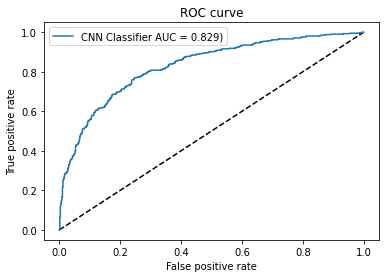

In [39]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN Classifier AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [46]:
for i in trainData.index:
    if trainData['label'][i] == '0':
        print(f"News: {trainData['text'][i]}, Label: {trainData['label'][i]}")
        break

News: It’s safe to say that Instagram Stories has far surpassed its competitor Snapchat in popularity since it’s inception two years ago—and your favorite celebrities have hopped on the social media trend. Unlike a highly curated photo feed, Instagram Stories is where celebrities seem to be comfortable enough to be raw and open.  Need something to do while you’re waiting in line or on a short break? Take a peek at these celebrities’ Instagram Stories for some surprisingly engaging entertainment.  Busy Philipps, @busyphilipps  A fantastic story teller, Busy was dubbed by The New Yorker as “the breakout star of Instagram Stories”. She captures everything from morning workouts to paparazzi run-ins and everything in between. If it isn’t on Busy’s story, I am assuming it didn’t happen.  Mandy Moore, @mandymooremm  Following Mandy Moore for her many This is Us behind-the-scenes stories is worth it alone! She also InstaStoried her home being built and decorated, her Mount Kilimanjaro climb, a

In [49]:
for i in trainData.index:
    if i == 1511:
        print(f"News: {trainData['text'][i]}, Label: {trainData['label'][i]}")
        break

News: Ryan Reynolds and Blake Lively routinely troll each other on social media, but the Deadpool star took it to the next level when he was forced to defend his marriage this weekend.  An "insider" allegedly told IB Times, "The past few years, Ryan's been working out of town while Blake stays home with the kids. The distance between them has taken its toll." The gossip site tweeted, "Ryan Reynolds and wife Blake Lively struggling to spend 'quality time'" together.  Advertisement - Continue Reading Below  And Reynolds' response to this report? "I wish. I could use a little 'me time'."  As per usual, Reynolds is ready to tease his wife on social media, which suggests that their marriage is more than fine.  I wish. I could use a little “me time”. https://t.co/S6kXFsWaMe — Ryan Reynolds (@VancityReynolds) March 31, 2018  Reynolds and Lively have a long history of trolling one another, and their constant joking appears to help keep their relationship alive.  But, perhaps the couple's sweet

In [24]:
from sklearn.preprocessing import MinMaxScaler

cnnModel = Sequential()
cnnModel.add(layers.Embedding(vocabSize, 16, input_length=1000))
cnnModel.add(layers.Dropout(0.2))

cnnModel.add(layers.Convolution1D(32,4,activation='relu'))
cnnModel.add(layers.Dropout(0.3))

cnnModel.add(layers.AveragePooling1D())

cnnModel.add(layers.Convolution1D(64,4,activation='relu'))
cnnModel.add(layers.Dropout(0.4))

cnnModel.add(layers.AveragePooling1D())

cnnModel.add(layers.Flatten())
cnnModel.add(layers.Dropout(0.6))

cnnModel.add(layers.Dense(units=1, activation='sigmoid'))

cnnModel.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), 
                    metrics=[tf.keras.metrics.BinaryAccuracy()])

normal = MinMaxScaler().fit(X_train_seq_trunc)
X_train_seq_trunc_n = normal.transform(X_train_seq_trunc)
X_test_seq_trunc_n = normal.transform(X_test_seq_trunc)

In [55]:
print(X_test_seq_trunc_n.shape, X_train_seq_trunc_n.shape)

(998, 1000) (3988, 1000)


In [57]:
X_train_seq_trunc_n

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.42575928e-02, 1.89202646e-03, 2.57484777e-01],
       [4.39187058e-01, 1.16900956e-04, 1.98767641e-04, ...,
        3.22412823e-02, 1.28031866e-04, 4.30480379e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.82367829e-02, 2.40273135e-02, 2.43713351e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.25140607e-03, 8.66348958e-03, 8.78157420e-03],
       [2.04287023e-02, 7.92003975e-03, 4.25930658e-05, ...,
        2.58436445e-02, 2.15932854e-01, 1.55051872e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.17154106e-02, 1.96315527e-03, 7.30153360e-03]])

In [25]:
checkpoint_n = ModelCheckpoint('model1.h5',verbose=1, monitor='loss',save_best_only=True, mode='auto')


cnnModel.fit(x=X_train_seq_trunc_n, y=y_train, batch_size=256, epochs=25, 
                validation_data=(X_test_seq_trunc_n,y_test), callbacks=[checkpoint_n])

Epoch 1/25
16/16 [==============================] - ETA: 0s - loss: 0.6764 - binary_accuracy: 0.5980
Epoch 1: loss improved from inf to 0.67639, saving model to model1.h5
16/16 [==============================] - 11s 582ms/step - loss: 0.6764 - binary_accuracy: 0.5980 - val_loss: 0.6796 - val_binary_accuracy: 0.5822
Epoch 2/25
16/16 [==============================] - ETA: 0s - loss: 0.6734 - binary_accuracy: 0.5995
Epoch 2: loss improved from 0.67639 to 0.67339, saving model to model1.h5
16/16 [==============================] - 9s 553ms/step - loss: 0.6734 - binary_accuracy: 0.5995 - val_loss: 0.6810 - val_binary_accuracy: 0.5822
Epoch 3/25
16/16 [==============================] - ETA: 0s - loss: 0.6751 - binary_accuracy: 0.5995
Epoch 3: loss did not improve from 0.67339
16/16 [==============================] - 8s 524ms/step - loss: 0.6751 - binary_accuracy: 0.5995 - val_loss: 0.6810 - val_binary_accuracy: 0.5822
Epoch 4/25
16/16 [==============================] - ETA: 0s - loss: 0.6728

In [26]:
cnnModel = keras.models.load_model('model1.h5')

In [27]:
pred = cnnModel.evaluate(X_test_seq_trunc_n, y_test)
pred

32/32 [==============================] - 0s 9ms/step - loss: 0.6800 - binary_accuracy: 0.5822


[0.6799591183662415, 0.5821643471717834]

In [28]:
from sklearn.preprocessing import StandardScaler

cnnModel = Sequential()
cnnModel.add(layers.Embedding(vocabSize, 16, input_length=1000))
cnnModel.add(layers.Dropout(0.2))

cnnModel.add(layers.Convolution1D(32,4,activation='relu'))
cnnModel.add(layers.Dropout(0.3))

cnnModel.add(layers.AveragePooling1D())

cnnModel.add(layers.Convolution1D(64,4,activation='relu'))
cnnModel.add(layers.Dropout(0.4))

cnnModel.add(layers.AveragePooling1D())

cnnModel.add(layers.Flatten())
cnnModel.add(layers.Dropout(0.6))

cnnModel.add(layers.Dense(units=1, activation='sigmoid'))

cnnModel.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), 
                    metrics=[tf.keras.metrics.BinaryAccuracy()])

standard = StandardScaler().fit(X_train_seq_trunc)
X_train_seq_trunc_s = standard.transform(X_train_seq_trunc)
X_test_seq_trunc_s = standard.transform(X_test_seq_trunc)

In [58]:
X_train_seq_trunc_s

array([[-0.11383641, -0.11465849, -0.11532675, ...,  0.04941733,
        -0.40346006,  1.06823431],
       [10.55684767, -0.11182726, -0.11056632, ..., -0.17497167,
        -0.41655438, -0.16237554],
       [-0.11383641, -0.11465849, -0.11532675, ...,  0.07730582,
        -0.23914757, -0.26955743],
       ...,
       [-0.11383641, -0.11465849, -0.11532675, ..., -0.39216683,
        -0.3531948 , -0.35902397],
       [ 0.38250842,  0.07715745, -0.11430666, ..., -0.21981005,
         1.18538684, -0.40052156],
       [-0.11383641, -0.11465849, -0.11532675, ..., -0.03848561,
        -0.40293207, -0.36751763]])

In [29]:
checkpoint_s = ModelCheckpoint('model2.h5',verbose=1, monitor='loss',save_best_only=True, mode='auto')


cnnModel.fit(x=X_train_seq_trunc_s, y=y_train, batch_size=256, epochs=25, 
                validation_data=(X_test_seq_trunc_s,y_test), callbacks=[checkpoint_s])

Epoch 1/25
16/16 [==============================] - ETA: 0s - loss: 0.6778 - binary_accuracy: 0.5965
Epoch 1: loss improved from inf to 0.67784, saving model to model2.h5
16/16 [==============================] - 8s 433ms/step - loss: 0.6778 - binary_accuracy: 0.5965 - val_loss: 0.6809 - val_binary_accuracy: 0.5822
Epoch 2/25
16/16 [==============================] - ETA: 0s - loss: 0.6738 - binary_accuracy: 0.5995
Epoch 2: loss improved from 0.67784 to 0.67380, saving model to model2.h5
16/16 [==============================] - 6s 403ms/step - loss: 0.6738 - binary_accuracy: 0.5995 - val_loss: 0.6798 - val_binary_accuracy: 0.5822
Epoch 3/25
16/16 [==============================] - ETA: 0s - loss: 0.6735 - binary_accuracy: 0.5995
Epoch 3: loss improved from 0.67380 to 0.67353, saving model to model2.h5
16/16 [==============================] - 7s 412ms/step - loss: 0.6735 - binary_accuracy: 0.5995 - val_loss: 0.6796 - val_binary_accuracy: 0.5822
Epoch 4/25
16/16 [==========================

In [30]:
cnnModel = keras.models.load_model('model2.h5')

In [32]:
pred = cnnModel.evaluate(X_test_seq_trunc_s, y_test)
pred

32/32 [==============================] - 0s 9ms/step - loss: 0.7115 - binary_accuracy: 0.5802


[0.7115397453308105, 0.5801603198051453]

In [53]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

logi = LogisticRegressionCV(Cs=20, cv=3, random_state=42, max_iter=100)
logi.fit(X_train_seq_trunc, y_train)

y_pred = logi.predict(X_test_seq_trunc)
acc = accuracy_score(y_test, y_pred)
acc


D:\Imp Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Imp Programs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

0.5781563126252505